<a href="https://colab.research.google.com/github/on-ferreira/NBAPlayers-Prediction-Stats/blob/main/ML-Testing/Testing_targetting_columns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0     MP    FG   FGA    FG%   3P  3PA  3P%   FT  FTA  ...  STL%  \
0           0  36.06  12.0  22.0  0.545  1.0  5.0  0.2  0.0  3.0  ...   1.3   
1           1  30.80   4.0  13.0  0.308  0.0  3.0  0.0  4.0  8.0  ...   4.9   
2           2  33.93  13.0  19.0  0.684  0.0  2.0  0.0  3.0  5.0  ...   1.6   
3           3  33.33   9.0  19.0  0.474  0.0  3.0  0.0  4.0  4.0  ...   5.9   
4           4  35.06   9.0  23.0  0.391  1.0  5.0  0.2  4.0  7.0  ...   5.9   

   BLK%  TOV%  USG%   ORtg   DRtg   BPM  opp  season        date  
0   0.0   4.1  29.0  106.0   96.0   7.1  CHI    2016  2015-10-27  
1   0.0  15.4  27.5   83.0   72.0  -0.4  MEM    2016  2015-10-28  
2   0.0  15.9  33.6  117.0  102.0   9.4  MIA    2016  2015-10-30  
3   4.7  12.6  32.3  113.0   88.0  13.1  PHI    2016  2015-11-02  
4   2.3  10.3  36.8   88.0   83.0   7.8  NYK    2016  2015-11-04  

[5 rows x 40 columns]
       Unnamed: 0          MP          FG         FGA         FG%          3P  \
count  558.000000  

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='MP', ylabel='PTS'>

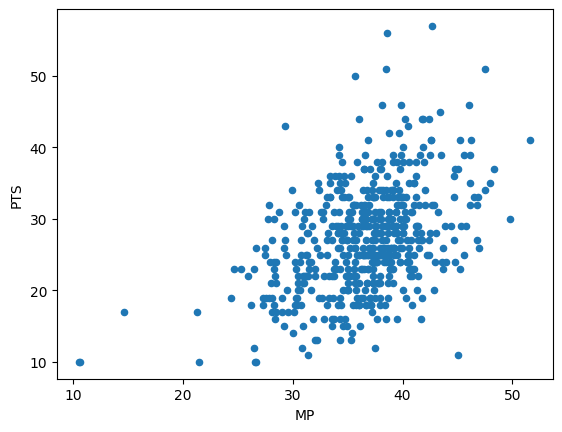

In [ ]:
import pandas as pd

df = pd.read_csv('lebron james.csv')

# Exibe as primeiras linhas do DataFrame
print(df.head())

# Calcula algumas estatísticas descritivas básicas
print(df.describe())

# Plota um gráfico de dispersão
df.plot.scatter(x='MP', y='PTS')

TypeError: ignored

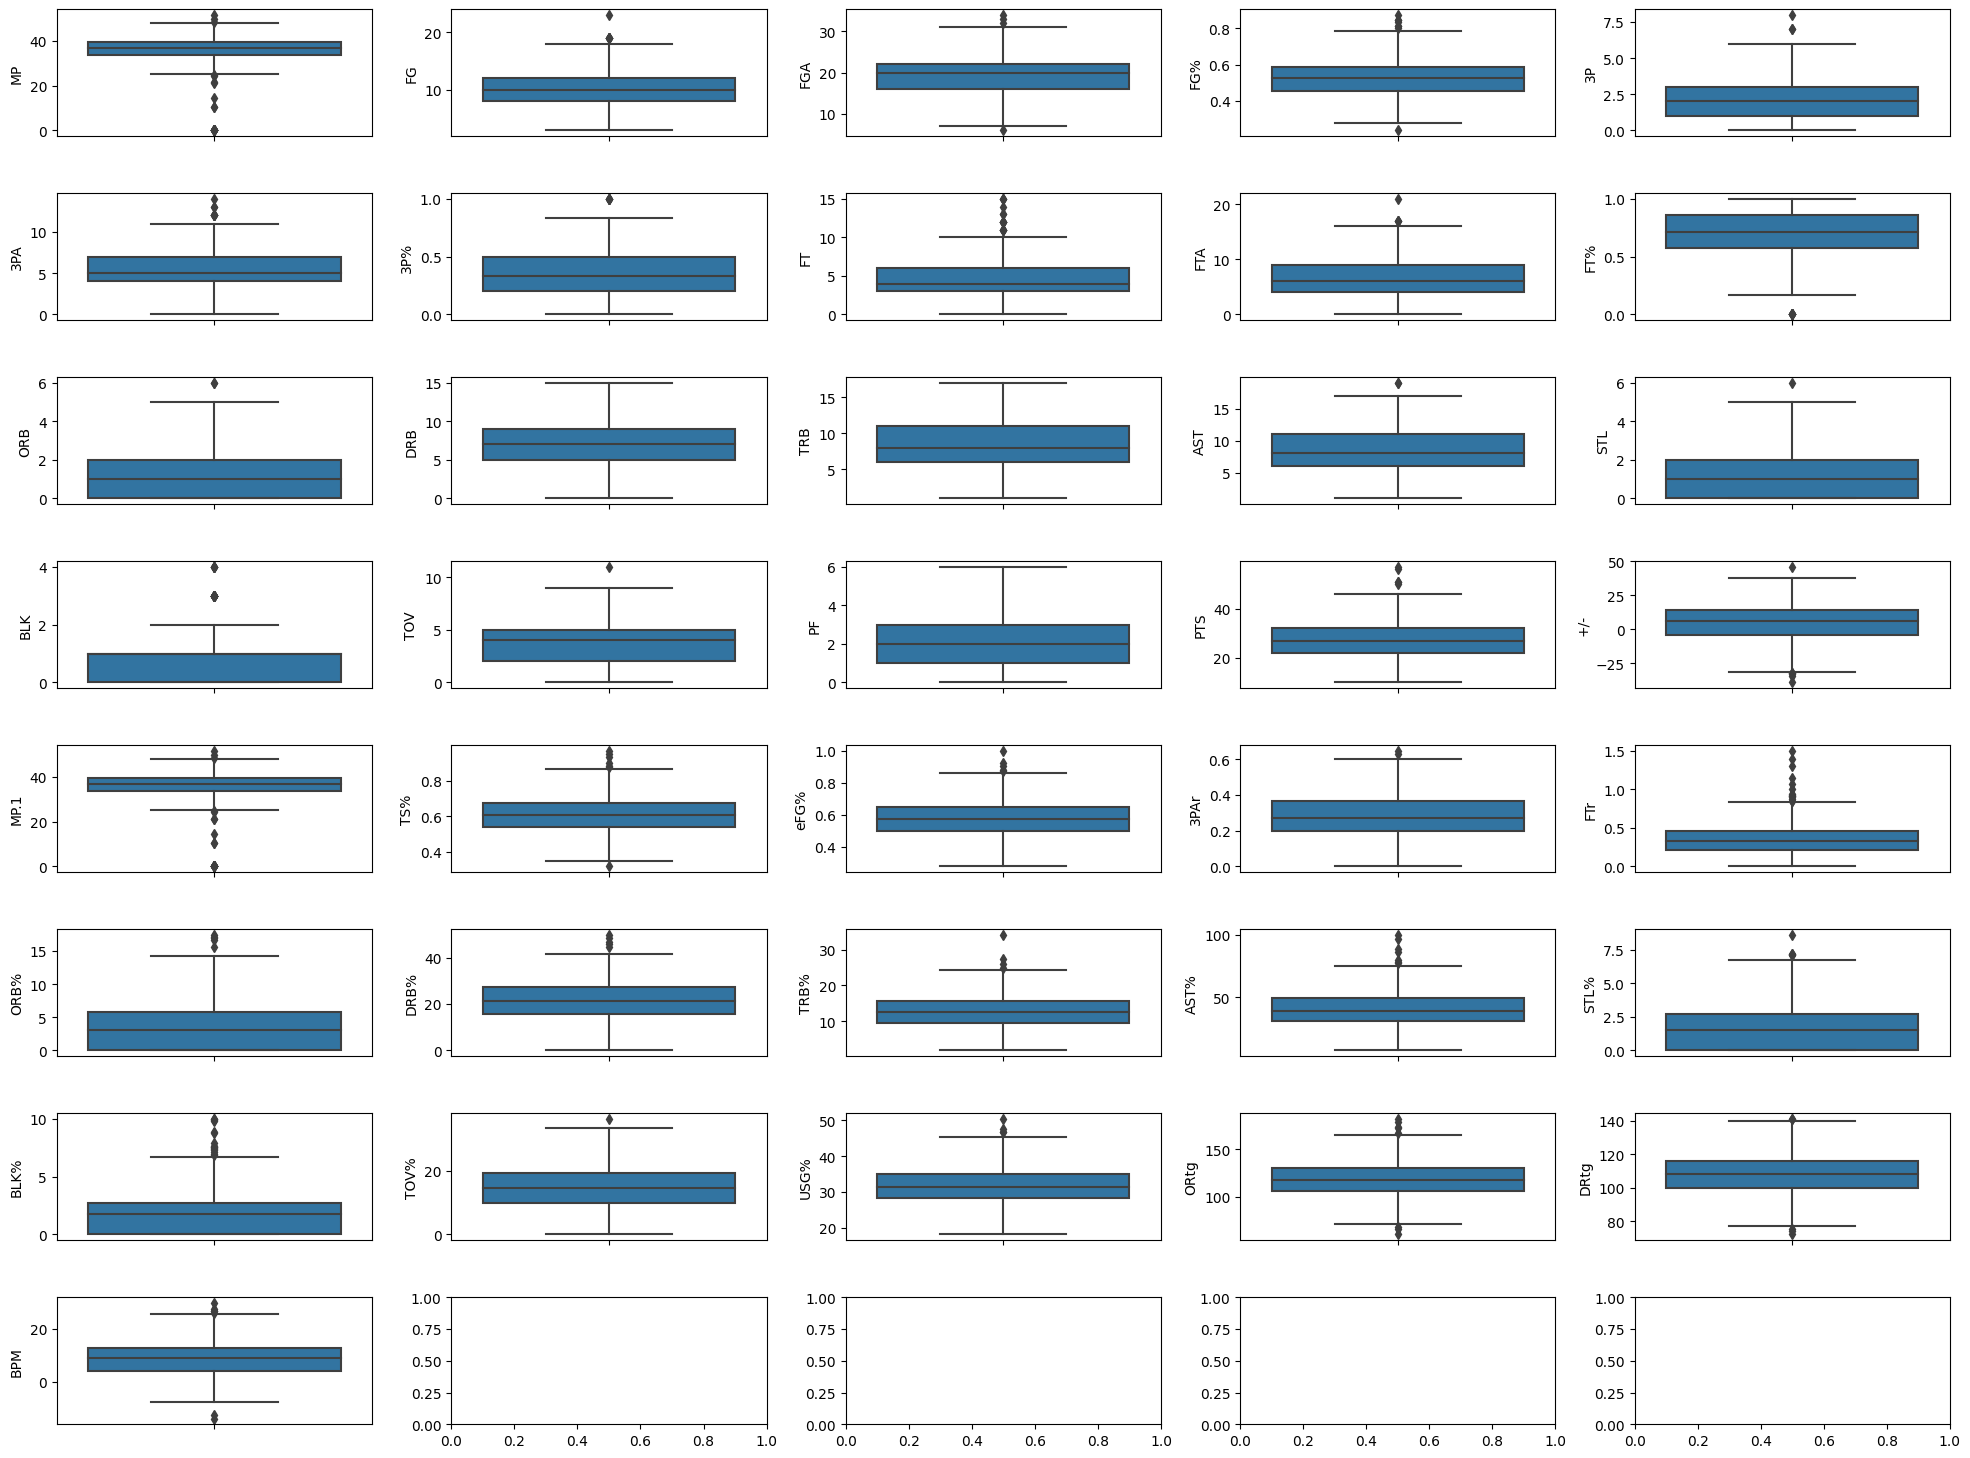

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of all column names, except for Unnamed.
cols = list(df.iloc[:, 1:])

# Create a 3x5 matrix of subplots.
fig, axes = plt.subplots(8, 5, figsize=(20, 15))

# Create padding around subplots to make the axis labels readable.
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a box plot for each one.
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=df[cols[i]])

----
Using feature engineering to create new features
----

In [ ]:
# set the number of past games to consider for rolling average
num_past_games = 5

# calculate rolling average of points scored for each player
df['RollingAvgPoints'] = df['PTS'].rolling(window=num_past_games, min_periods=1).mean().shift()

# sort the DataFrame by player and date
df = df.sort_values(['date'])

df['date'] = pd.to_datetime(df['date'])

# calculate the number of days of rest for each game
df['RestDays'] = df['date'].diff().apply(lambda x: x.days - 1)

print(df)



     Unnamed: 0     MP    FG   FGA    FG%   3P   3PA    3P%   FT   FTA  ...  \
0             0  36.06  12.0  22.0  0.545  1.0   5.0  0.200  0.0   3.0  ...   
1             1  30.80   4.0  13.0  0.308  0.0   3.0  0.000  4.0   8.0  ...   
2             2  33.93  13.0  19.0  0.684  0.0   2.0  0.000  3.0   5.0  ...   
3             3  33.33   9.0  19.0  0.474  0.0   3.0  0.000  4.0   4.0  ...   
4             4  35.06   9.0  23.0  0.391  1.0   5.0  0.200  4.0   7.0  ...   
..          ...    ...   ...   ...    ...  ...   ...    ...  ...   ...  ...   
553         553  44.68  15.0  26.0  0.577  2.0   7.0  0.286  4.0   7.0  ...   
554         554  35.88  16.0  29.0  0.552  4.0  10.0  0.400  2.0   3.0  ...   
555         555  40.60  17.0  29.0  0.586  0.0   4.0  0.000  4.0   4.0  ...   
556         556  41.63  14.0  27.0  0.519  7.0  13.0  0.538  4.0   6.0  ...   
557         557  39.51  13.0  23.0  0.565  3.0   8.0  0.375  9.0  12.0  ...   

     TOV%  USG%   ORtg   DRtg   BPM  opp  season   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Remove the lines with NaNs
df = df.dropna()

# # Calculate the mean and standard deviation of the 'MP' column
# mp_mean = df['MP'].mean()
# mp_std = df['MP'].std()

# # Filter the data to include only rows with 'MP' within +- 2 sd from the mean
# df = df[(df['MP'] >= mp_mean - 2 * mp_std) & (df['MP'] <= mp_mean + 2 * mp_std)]

# define the upper and lower bounds as the 5th and 95th percentiles
lower_bound = df['MP'].quantile(0.15)
upper_bound = df['MP'].quantile(0.85)

# filter the data to exclude any values outside of the bounds
df2 = df[(df['MP'] >= lower_bound) & (df['MP'] <= upper_bound)]


# Substitua os NaNs por um valor específico
df = df.fillna(value=0)     # Sendo inútil por causa do dropna() ali em cima

# Filter out unnecessary columns
relevant_cols = ['MP', 'FG', 'FGA','FG%', '3P', '3PA','3P%', 'FT', 'FTA','FT%', 'ORB', 'DRB','TRB', 'AST',
                 'STL', 'BLK',
                 'TOV', 'PTS', 'opp','RollingAvgPoints','RestDays']

new_df = df2[relevant_cols]

# Encode opponent names as categorical variables
new_df = pd.get_dummies(new_df, columns=['opp'])

new_df['target_PTS'] = new_df['PTS'].shift(-1)

last = new_df.iloc[-1]
new_df = new_df.iloc[:new_df.shape[0]-1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(['target_PTS'], axis=1), new_df['target_PTS'],
                                                    test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 46.831618822125265


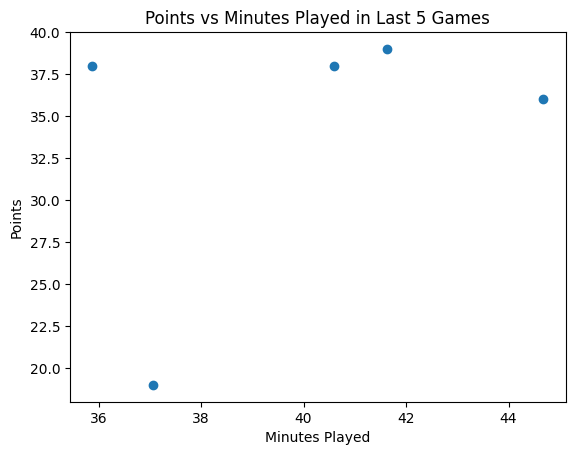

In [ ]:
import matplotlib.pyplot as plt

# Create a new dataframe containing only the last 5 games of each player
last_5_games = new_df.tail(5)

# Create a scatter plot of the points vs minutes played in the last 5 games
plt.scatter(last_5_games['MP'], last_5_games['PTS'])
plt.title('Points vs Minutes Played in Last 5 Games')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()

Linear Regression RMSE:  6.8425814964040725
Decision Tree Regression RMSE:  10.701401777337397
Random Forest Regression RMSE:  6.6203671600095815
Gradient Boosting Regression RMSE:  7.316998912552114
Neural Network Regression RMSE:  14.275151748053355
Cross-validation scores:  [-6.47422741 -6.52313029 -8.03028109 -7.13790483 -8.0277922 ]
Mean RMSE:  7.238667162235442


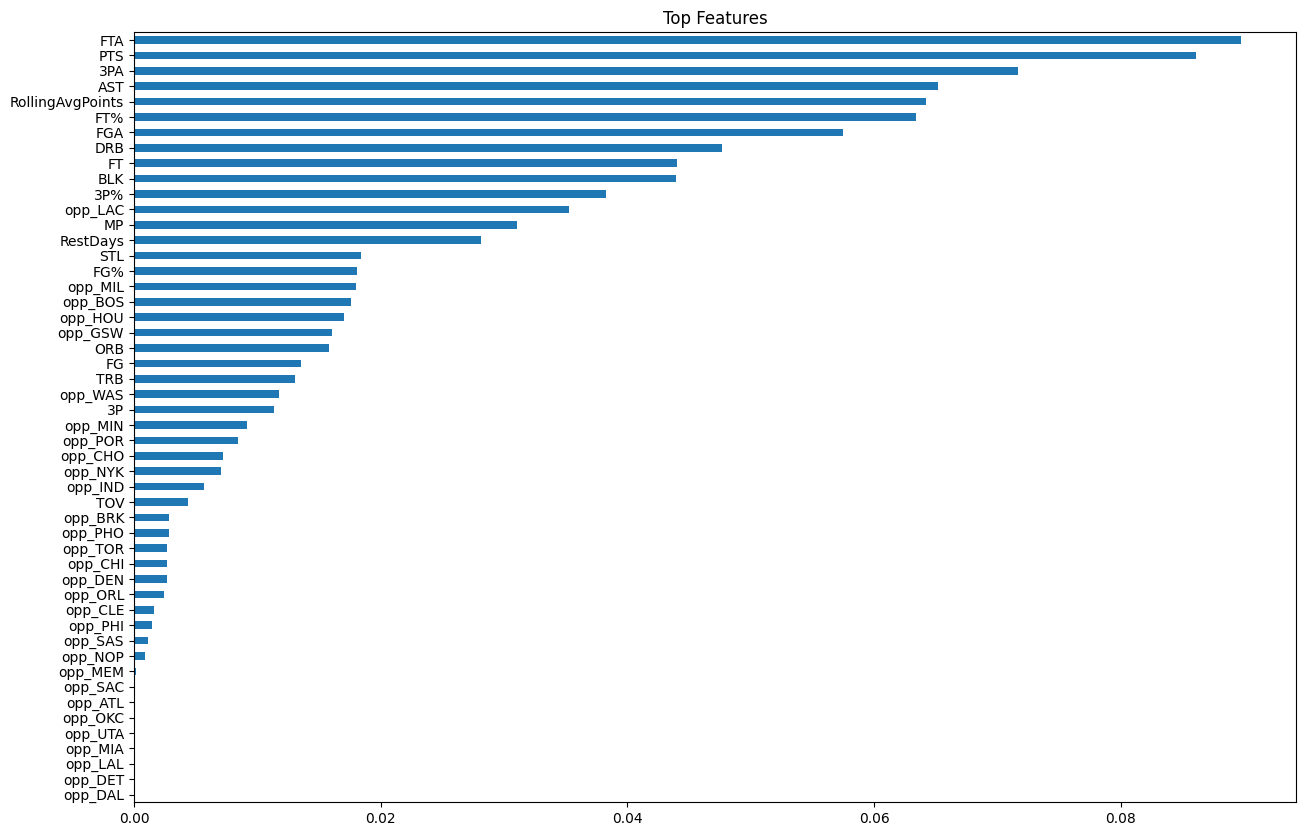

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np


# Declare the feature matrix X and the target variable y
X = new_df.drop('target_PTS', axis=1)
y = new_df['target_PTS']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)

# Train and test the Decision Tree Regression model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)

# Train and test the Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

# Compare the RMSE scores of each model
print("Linear Regression RMSE: ", lr_rmse)
print("Decision Tree Regression RMSE: ", dt_rmse)
print("Random Forest Regression RMSE: ", rf_rmse)


# Train and test the Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_scores = cross_val_score(gb, X, y, cv=5, scoring='neg_mean_squared_error')
gb_rmse_scores = np.sqrt(-gb_scores)
print("Gradient Boosting Regression RMSE: ", gb_rmse_scores.mean())

# Train and test the Neural Network model
nn = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000, random_state=42)
nn_scores = cross_val_score(nn, X, y, cv=5, scoring='neg_mean_squared_error')
nn_rmse_scores = np.sqrt(-nn_scores)
print("Neural Network Regression RMSE: ", nn_rmse_scores.mean())

# Create a linear regression object
lr = LinearRegression()

# Perform cross-validation
scores = cross_val_score(lr, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Print the scores and their mean
print("Cross-validation scores: ", scores)
print("Mean RMSE: ", -scores.mean())

gb.fit(X_train, y_train)
_all = list(new_df.drop('target_PTS', axis=1).columns)
top_features = pd.Series(gb.feature_importances_, index=_all).sort_values()
top_features.plot(kind="barh", figsize=(15, 10), title="Top Features")
plt.show()



----

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 779.3706 - mse: 779.3706 - val_loss: 725.4966 - val_mse: 725.4966
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 709.9380 - mse: 709.9380 - val_loss: 617.5704 - val_mse: 617.5704
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 552.9006 - mse: 552.9006 - val_loss: 384.5058 - val_mse: 384.5058
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 272.0410 - mse: 272.0410 - val_loss: 88.6646 - val_mse: 88.6646
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 69.6196 - mse: 69.6196 - val_loss: 53.3485 - val_mse: 53.3485
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 60.2021 - mse: 60.2021 - val_loss: 37.0119 - val_mse: 37.0119
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 55.1930 - mse: 55.1930 - val_loss: 36.9718 - val_mse: 36.9718
Epoch 8/100
18/18 [=====================

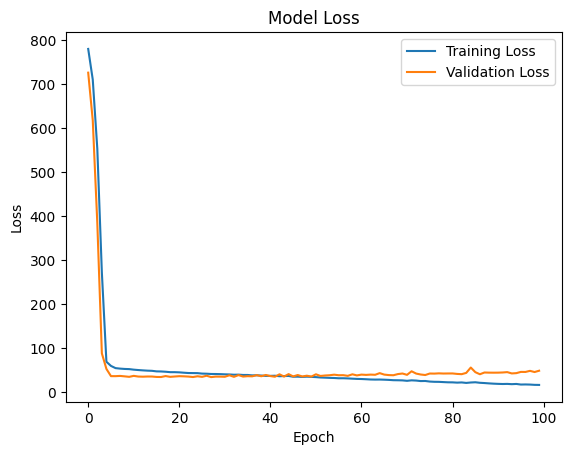

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
modelNN = Sequential()
modelNN.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelNN.add(Dense(32, activation='relu'))
modelNN.add(Dense(16, activation='relu'))
modelNN.add(Dense(1))

# Compile the model
modelNN.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the model and store the loss history
history = modelNN.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Test the model
nn_pred = modelNN.predict(X_test)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))

# Print the RMSE score
print("Neural Network Regression RMSE: ", nn_rmse)


# Extract the loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

----

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers

# Train and test the Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Random Forest Regression RMSE: ", rf_rmse)

# Create the neural network model
model = keras.Sequential()
model.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train and test the neural network model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
nn_pred = model.predict(X_test)
nn_rmse = mean_squared_error(y_test, nn_pred, squared=False)
print("Neural Network Regression RMSE: ", nn_rmse)


Random Forest Regression RMSE:  6.052447582518202
3/3 [==============================] - 0s 4ms/step
Neural Network Regression RMSE:  6.301121824151913
